# Predict Magnetic Structure

In [1]:
import os
os.environ['OMP_NUM_THREADS'] = '1'
os.environ['OPENBLAS_NUM_THREADS'] = '1'

import re
import copy
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from pyhf3.read import ReadInfo
from pyhf3 import draw
from pyhf3 import magstr

dir_name = 'baoso3_ms'
path_input = 'input/%s/' % dir_name.split('_')[0]
path_output = 'output/%s/' % dir_name
info_path, info_cell = ReadInfo(path_input)

ms = magstr.MagStr(path_output, info_path, info_cell)

#types = ['a', 'c', 'g']
#types_dict = {'a':0, 'c':1, 'g':2}

#figsize=(11, 6)
plt.rcParams.update({'font.size': 23})

In [3]:
mcn = [['rf', 'RandomForest'],
       #['xgb', 'XGBoost'],
       #['lgb', 'LightGBM'],
       #['cat', 'CatBoost'],
       #['lr', 'LinearRegression']
      ]

d1n = '%s/magstr/dos_dt%s_eta%.3f_bins%d_tol%.3f.csv' %\
(path_output, '2-0-0', 0.2, 1024, 0.1)
d2n = '%s/magstr/dos_dt%s_eta%.3f.csv' %\
(path_output, '4-0-0', 0.2)

for name, name_full in mcn:
    mc, df1, df2, df2_m, df2_w, y_test, y_pred, y_score =\
    ms.Predict(d1n, d2n, name, '')
    print(df2_m.loc[:, ['type', 'type_pred', 'score']])
    print(df2_w.loc[:, ['type', 'type_pred', 'score']])
    #ms.DrawConfMat(y_test, y_pred, name_full)

acc = 1192/1224 = 0.973856
Learn(rf--output/baoso3_ms//magstr/dos_dt2-0-0_eta0.200_bins1024_tol0.100.csv) : 11.100943s


ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- G_1024
- G_1025
- G_1026
- G_1027
- G_1028
- ...


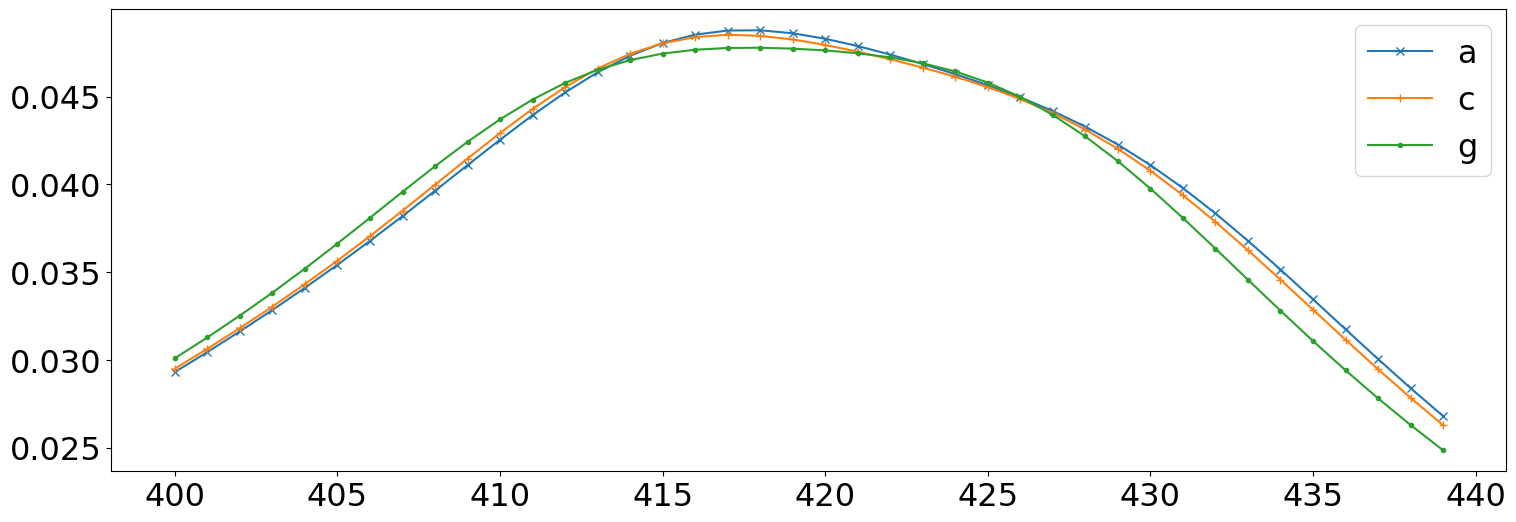

In [11]:
df2
fig, ax = plt.subplots(figsize=(18, 6))
x = np.arange(400, 440)
c_list = ['x', '+', '.']
for j, i in enumerate([0, 2, 3]):
    ax.plot(x, df2.iloc[i, x.min()+8:x.max()+9], marker=c_list[j], label=df2.iloc[i, 1])
ax.legend()
plt.show()

In [ ]:
ms.DrawSpec('', 0.5, 0, 'a', 6, 3)

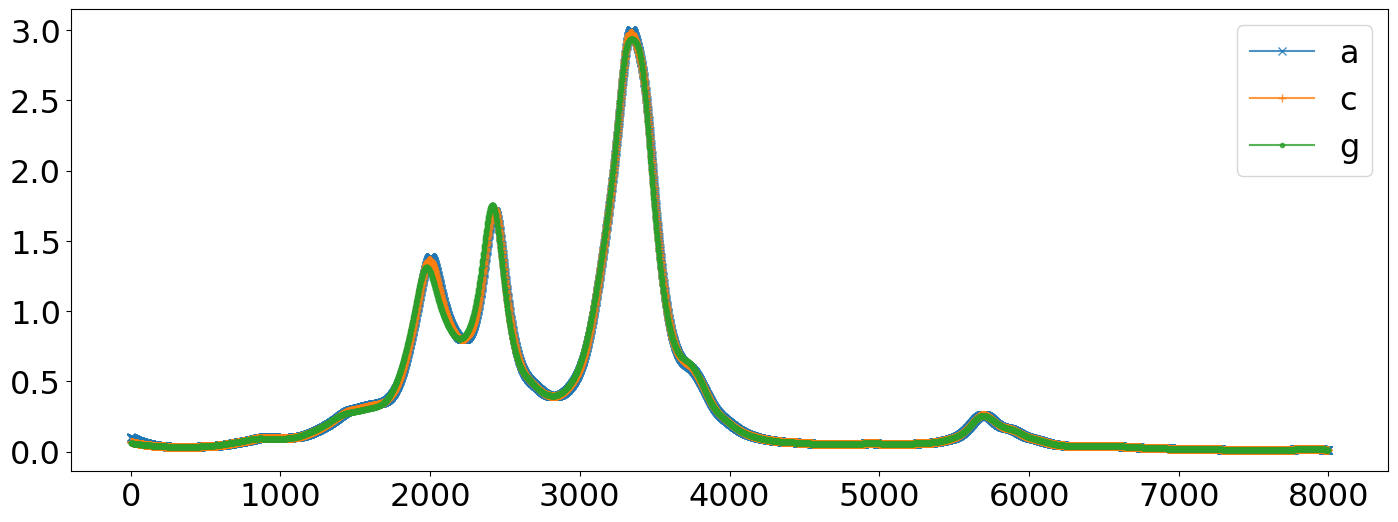

In [41]:
f_name ='/home/9yelin9/hf3/output/baoso3_ms/magstr/dos_dt4-0-0_eta0.200.csv'
df = pd.read_csv(f_name, index_col=0)
c_list = ['x', '+', '.']
x = np.arange(8000)

fig, ax = plt.subplots(figsize=(17, 6))
for j, i in enumerate([0, 2, 3]):
    ax.plot(x, df.iloc[i, x.min()+8:x.max()+9], marker=c_list[j], alpha=0.8, label=df2.loc[i, 'type'])
ax.legend()
plt.show()

In [ ]:
"""
def GetIdx0(df):
    for i in df.index:
        data = df.loc[i, :]
        dn = '%s/JU%.2f_SOC%.2f/' % (path_output, data['JU'], data['SOC'])
        d = [f for f in os.listdir(dn) if\
             re.match('band_.+N%.1f_U%.1f_.+m%f_.+fermi%f_' %\
                      (data['N'], data['U'], data['m'], data['fermi']), f)]
        df.loc[i, 'type'] = re.sub('band_', '',\
                                   re.search('band_[a-z]+\d?', d[0]).group())
    
    df['type_f'] = df['type_f'].replace(types_dict_inv)
    
    return df

def DrawHist(df, title, params, n):
    bins = len(df) - len(params)
    hist = df.drop(params, axis=1).sum()
    x = hist.index.to_list()
    
    xt = np.arange(0, len(x), bins//n, dtype=int)
    xt = np.append(xt, len(x)-1)
    
    fig, ax = plt.subplots(figsize=figsize, dpi=500)
    ax.bar(x, hist)
    ax.set_xticks([x[i] for i in xt])
    ax.set_title(title, loc='left')
    plt.show()
    
def DrawInput(df, title, prefix=''):
    alpha = 0.5
    bins0 = [len(np.unique(df['JU'])), len(np.unique(df['N']))//4, len(np.unique(df['U']))]
    xlim = [[-0.01, 0.31], [0, 12], [-0.1, 5.1]]
    
    for i, v in enumerate(['JU', 'N', 'U']):
        fig, ax = plt.subplots(figsize=figsize)
        _, bins = np.histogram(df[v], bins=bins0[i])
        for j, t in enumerate(types):
            df[df['type'] == j].hist(column=[v], ax=ax, bins=bins, alpha=alpha, label=t)
        ax.set_xlim(xlim[i])
        ax.legend()
        ax.set_title('%s%s\n'%(prefix,v)+title, loc='left')
        plt.title('')
    plt.show()

def DrawOutput(df, title, prefix='', zoom=False):
    bins0 = 50
    bins_ins0 = 20
    alpha = 0.5
    xlim = [[-0.1, 6.1], [], []]
    xlim_ins = [[-0.1, 1], [0, 10], [-0.1, 0.5]]
    
    for i, v in enumerate(['m', 'dntop', 'gap']):
        fig, ax = plt.subplots(figsize=figsize)
        _, bins = np.histogram(df[v], bins=bins0)
        for j, t in enumerate(types):
            df[df['type'] == j].hist(column=[v], ax=ax, bins=bins, alpha=alpha, label=t)

        if zoom:
            ins = ax.inset_axes([0.4,0.6,0.3,0.3])
            _, bins_ins = np.histogram(df[v], bins=bins_ins0)
            for j, t in enumerate(types):
                df[df['type'] == j].hist(column=[v], ax=ins, bins=bins_ins, alpha=alpha, label=t)
            ins.set_xlim(xlim_ins[i])
            ins.set_title('')
        if len(xlim[i]): ax.set_xlim(xlim[i])
        ax.legend()
        ax.set_title('%s%s\n'%(prefix,v)+title, loc='left')
        plt.title('')
    plt.show()
    
def DrawType(df, title, prefix=''):
    fig, ax = plt.subplots(figsize=figsize)
    
    df.hist(column=['type'], ax=ax)
    
    ax.set_xticks([0, 1, 2])
    ax.set_xticklabels(types)
    ax.set_xlim([-0.1, 2.1])
    ax.set_ylim([0, 1800])
    ax.set_title('%stype\n'%(prefix)+title, loc='left')
    plt.title('')
    plt.show()
    
def DrawMisType(df, title):
    bins0 = len(types)
    alpha = 0.5
    
    fig, ax = plt.subplots(figsize=figsize)
    _, bins = np.histogram(df['type'], bins=bins0)
    for i, t in enumerate(types):
        df[df['type_f'] == i].hist(column=['type'], ax=ax, bins=bins, alpha=alpha, label=types[i])
    ax.set_xticks([0, 1, 2])
    ax.set_xticklabels(types)
    ax.set_xlim([-0.1, 2.1])
    ax.legend()
    ax.set_title('misclassifed type\n'+title, loc='left')
    plt.title('')
    plt.show()
    
def DrawCorr(df):
    fig, ax = plt.subplots(figsize=figsize)
    corr = df.loc[:, ['JU', 'N', 'U', 'm', 'dntop', 'gap']].corr()
    sns.heatmap(corr, annot=True, fmt='.1f', ax=ax)
    plt.show()
    
def DrawImp(rf, bins, feature_names, title):
    estimators = rf.estimators_
    importances = rf.feature_importances_
    forest_importances = pd.Series(importances, index=feature_names)
    
    xt = np.arange(0, len(feature_names), bins//4, dtype=int)
    xt = np.append(xt, len(feature_names)-1)

    fig, ax = plt.subplots(figsize=(25, 6))
    std = np.std([importances for tree in estimators], axis=0)
    forest_importances.plot.bar(yerr=std, ax=ax)
    ax.set_xticks(xt)
    ax.set_title("Feature importances %s" % title)
    ax.set_ylabel("Mean decrease in impurity")
    fig.tight_layout()
"""